In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#from https://stackoverflow.com/questions/34372480/rotate-point-about-another-point-in-degrees-python

def rotate(point_to_be_rotated, angle, center_point = (0,0)):
    angle = angle*np.pi/180
    xnew = np.cos(angle)*(point_to_be_rotated[0] - center_point[0]) - np.sin(angle)*(point_to_be_rotated[1] - center_point[1]) + center_point[0]
    ynew = np.sin(angle)*(point_to_be_rotated[0] - center_point[0]) + np.cos(angle)*(point_to_be_rotated[1] - center_point[1]) + center_point[1]
    
    return (round(xnew,2),round(ynew,2))

In [683]:
x_one=5
y_one=5
y_two=10
x_two=10

In [684]:
#find center of 'box'
xc = (x_two + x_one)/2
yc = (y_two + y_one)/2
#all transformations/rotations will be relative to this stationary point.

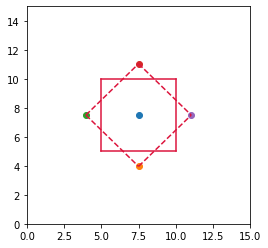

In [686]:
plt.figure(figsize=(4,4))

plt.scatter(xc,yc)
plt.scatter(7.5,3.96)
plt.scatter(3.96,7.5)
plt.scatter(7.5,11.04)
plt.scatter(11.04,7.5)
line_one = plt.plot([3.96,7.5],[7.5,3.96],color='crimson',linestyle='--')
line_two = plt.plot([7.5,11.04],[3.96,7.5],color='crimson',linestyle='--')
line_three = plt.plot([3.96,7.5],[7.5,11.04],color='crimson',linestyle='--')
line_four = plt.plot([7.5,11.04],[11.04,7.5],color='crimson',linestyle='--')

line_one = plt.plot([x_one,x_one],[y_one,y_two],color='crimson')
line_two = plt.plot([x_one,x_two],[y_one,y_one],color='crimson')
line_three = plt.plot([x_two,x_two],[y_one,y_two],color='crimson')
line_four = plt.plot([x_one,x_two],[y_two,y_two],color='crimson')

plt.xlim(0,15)
plt.ylim(0,15)
plt.show()

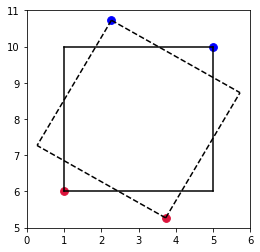

In [687]:
#this general code should apply to any click events p1 and p2

plt.figure(figsize=(4,4))

p1=(5,10)
p2=(1,6)

plt.plot([p1[0],p1[0]],[p1[1],p2[1]],color='black')   #1112
plt.plot([p1[0],p2[0]],[p2[1],p2[1]],color='black')   #1212
plt.plot([p2[0],p1[0]],[p1[1],p1[1]],color='black')   #2111
plt.plot([p2[0],p2[0]],[p1[1],p2[1]],color='black')   #2212

plt.scatter(p1[0],p1[1],color='blue',s=60)
plt.scatter(p2[0],p2[1],color='crimson',s=60)

angle = 60

(xc,yc) = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
one_rot = rotate(point_to_be_rotated = p1, angle = angle, center_point = (xc,yc))
two_rot = rotate(point_to_be_rotated = p2, angle = angle, center_point = (xc,yc))
three_rot = rotate(point_to_be_rotated = (p1[0],p2[1]), angle = angle, center_point = (xc,yc))
four_rot = rotate(point_to_be_rotated = (p2[0],p1[1]), angle = angle, center_point = (xc,yc))

plt.plot([one_rot[0],three_rot[0]],[one_rot[1],three_rot[1]],color='black',linestyle='--')   #1--3
plt.plot([one_rot[0],four_rot[0]],[one_rot[1],four_rot[1]],color='black',linestyle='--')     #1--4
plt.plot([two_rot[0],three_rot[0]],[two_rot[1],three_rot[1]],color='black',linestyle='--')   #2--3
plt.plot([two_rot[0],four_rot[0]],[two_rot[1],four_rot[1]],color='black',linestyle='--')     #2--4

plt.scatter(one_rot[0],one_rot[1],color='blue',s=60)
plt.scatter(two_rot[0],two_rot[1],color='crimson',s=60)

plt.show()

In [933]:
#first, I'll rotate points and trace the sides with equations, where each point of the drawn
#equation will map onto a pixel coordinate of the background

def get_xym(p1,p2,angle=80):
    
    if angle%90 != 0:      #if angle is not divisible by 90, can rotate using this algorithm. 
    
        (xc,yc) = ((p1[0]+p2[0])/2, (p1[1]+p2[1])/2)
        one_rot = rotate(point_to_be_rotated = p1, angle = angle, center_point = (xc,yc))
        two_rot = rotate(point_to_be_rotated = p2, angle = angle, center_point = (xc,yc))
        three_rot = rotate(point_to_be_rotated = (p1[0],p2[1]), angle = angle, center_point = (xc,yc))
        four_rot = rotate(point_to_be_rotated = (p2[0],p1[1]), angle = angle, center_point = (xc,yc))

        x1 = np.linspace(one_rot[0],three_rot[0],50)
        m1 = (one_rot[1] - three_rot[1])/(one_rot[0] - three_rot[0])
        y1 = three_rot[1] + m1*(x1 - three_rot[0])

        x2 = np.linspace(one_rot[0],four_rot[0],50)
        m2 = (one_rot[1] - four_rot[1])/(one_rot[0] - four_rot[0])
        y2 = four_rot[1] + m2*(x2 - four_rot[0])

        x3 = np.linspace(two_rot[0],three_rot[0],50)
        m3 = (two_rot[1] - three_rot[1])/(two_rot[0] - three_rot[0])
        y3 = two_rot[1] + m3*(x3 - two_rot[0])

        x4 = np.linspace(two_rot[0],four_rot[0],50)
        m4 = (two_rot[1] - four_rot[1])/(two_rot[0] - four_rot[0])
        y4 = two_rot[1] + m4*(x4 - two_rot[0])

        return [x1,x2,x3,x4],[y1,y2,y3,y4],[m1,m2,m3,m4],angle
    
    elif (angle/90)%2 == 0:  #if angle is divisible by 90 but is 0, 180, 360, ..., no change to rectangle
        x1 = np.zeros(50)+p1[0]
        y1 = np.linspace(p2[1],p1[1],50)

        x2 = np.linspace(p1[0],p2[0],50)
        y2 = np.zeros(50)+p2[1]

        x3 = np.linspace(p2[0],p1[0],50)
        y3 = np.zeros(50)+p1[1]

        x4 = np.zeros(50)+p2[0]
        y4 = np.linspace(p1[1],p2[1],50)
        
        return [x1,x2,x3,x4],[y1,y2,y3,y4],[0,0,0,0],angle
   
    else:                   #if angle is divisible by 90 but is 90, 270, ..., rectangle perpendicular
                            #to the original
        y1 = np.zeros(50)+p1[0]
        x1 = np.linspace(p2[1],p1[1],50)

        y2 = np.linspace(p1[0],p2[0],50)
        x2 = np.zeros(50)+p2[1]

        y3 = np.linspace(p2[0],p1[0],50)
        x3 = np.zeros(50)+p1[1]

        y4 = np.zeros(50)+p2[0]
        x4 = np.linspace(p1[1],p2[1],50)
        
        return [x1,x2,x3,x4],[y1,y2,y3,y4],[0,0,0,0],angle

In [817]:
def func(x,m,b):
    return m*x+b

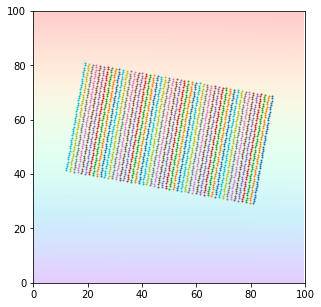

In [931]:
x = np.arange(10000).reshape(100,100)

p1 = (70,90)
p2 = (30,20)
    
x_vals,y_vals,m_vals,angle = get_xym(p1=p1,p2=p2,angle=80)

plt.figure(figsize=(5,5))
plt.imshow(x,origin='lower',cmap='rainbow',alpha=0.2)

#for i in range(4):
#    plt.scatter(x_vals[i],y_vals[i])   #plot the perimeter of the rectangle

#initiate lists
list_to_mean = []
mean_list = []

for i in range(50):    #for the entire x extent of the blue (red?) side, 
                                      #find x range of between blue and red elements, 
                                      #determine the equation variables to connect these elements
                                      #within this desired x range, then plot. proceed to next set
                                      #of elements, etc.
        
    #points from either x4,y4 (index=3) or x1,y1 (index=0)
    if angle%90 != 0:
        xpoints = np.linspace(x_vals[3][i],x_vals[0][-(i+1)],50)
        b = y_vals[0][-(i+1)] - (m_vals[2]*x_vals[0][-(i+1)])
        ypoints = func(xpoints,m_vals[2],b)
        plt.scatter(xpoints,ypoints,s=1)
        
        for n in range(len(ypoints)):
            list_to_mean.append(x[int(round(ypoints[n],3))][int(xpoints[n])])
            x[int(round(ypoints[n],3))][int(xpoints[n])]=False
        mean_list.append(np.mean(list_to_mean))
        list_to_mean = []
    
    if (angle/90)%2 == 0:
        xpoints = np.linspace(x_vals[3][i],x_vals[0][-(i+1)],50)
        b = y_vals[0][-(i+1)] - (m_vals[2]*x_vals[0][-(i+1)])
        ypoints = func(xpoints,m_vals[2],b)
        plt.scatter(xpoints,ypoints,s=1)
        
        for n in range(len(ypoints)):
            list_to_mean.append(x[int(round(ypoints[n],5))][int(xpoints[n])])
            x[int(round(ypoints[n],5))][int(xpoints[n])]=False
        mean_list.append(np.mean(list_to_mean))
        list_to_mean = []
        

if ((angle/90)%2 != 0) & (angle%90 == 0):
    ypoints = np.linspace(y_vals[3][0],y_vals[0][-1],50)   #y_val start and end are the same at
                                                               #every index in this case
    list_to_mean = []
    mean_list = []
    
    for i in range(np.abs(p1[1]-p2[1])):
        xpoints = x_vals[1]+i        
        plt.scatter(xpoints,ypoints,s=1)
        for n in range(len(ypoints)):
            list_to_mean.append(x[int(round(ypoints[n]),3)][int(xpoints[n])])
            x[int(round(ypoints[n]),3)][int(xpoints[n])]=False
        mean_list.append(np.mean(list_to_mean))
        list_to_mean = []
            
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

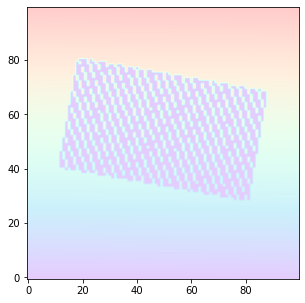

In [932]:
plt.figure(figsize=(5,5))
plt.imshow(x,cmap='rainbow',origin='lower',alpha=0.2)
plt.show()

In [ ]:
#a wee bit clumpy, but no matter. maybe. I hope.

In [924]:
#NEXT:
    #I suppose I can transition to assigning a spot on the GUI for those arrows...

In [926]:
#I COULD HAVE CLICKABLE ARROWS WHICH, ACCORDING TO A STEP SIZE SET BY THE USER, 
#WILL ROTATE THE SQUARE RECTANGLE DOOHICKEY. 
#ASSIGN INCLINATION ARROWS TO ARROW KEYS, MAYBE?

In [ ]:
#soniface-squares1.py --> all three square/rectangle options, no inclination
#soniface-squares2.py --> only 'draw your own rectangle' option, inclination arrows